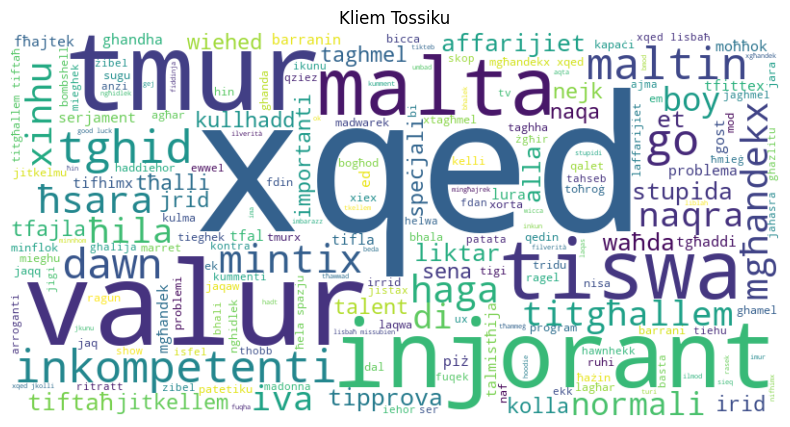

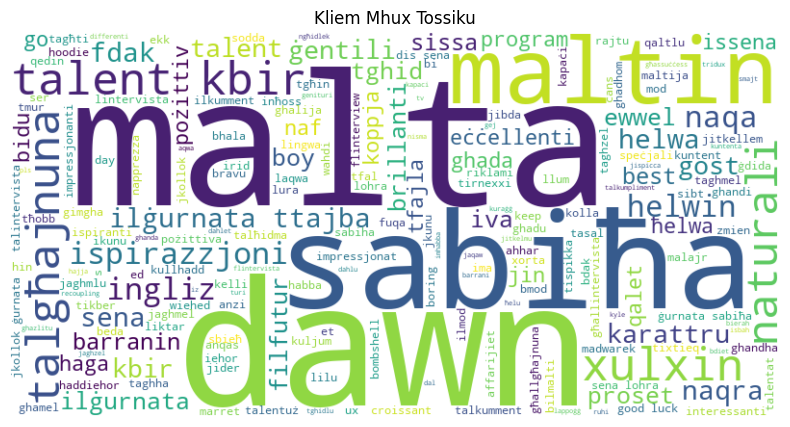

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample dataset with Maltese comments written using English keyboard
df = pd.read_csv('./Analysis.csv')

# Generate word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Separate the text based on isToxic classification
toxic_text = ' '.join(df[df['isToxic'] == 1]['comment'])
nontoxic_text = ' '.join(df[df['isToxic'] == 0]['comment'])

# Generate and display word clouds
generate_word_cloud(toxic_text, 'Kliem Tossiku')
generate_word_cloud(nontoxic_text, 'Kliem Mhux Tossiku')


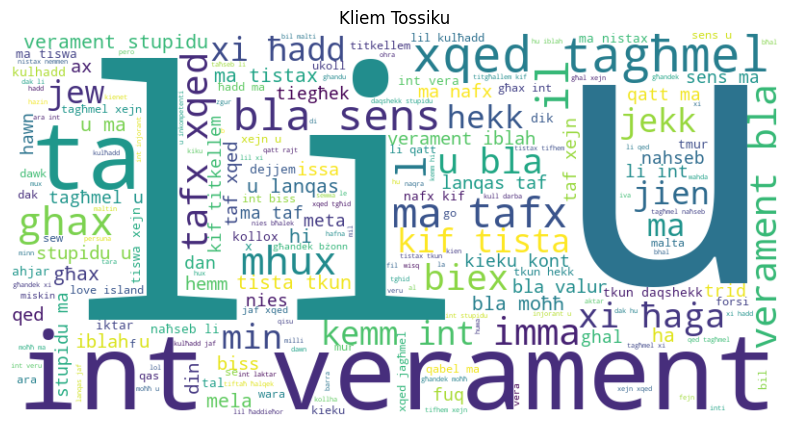

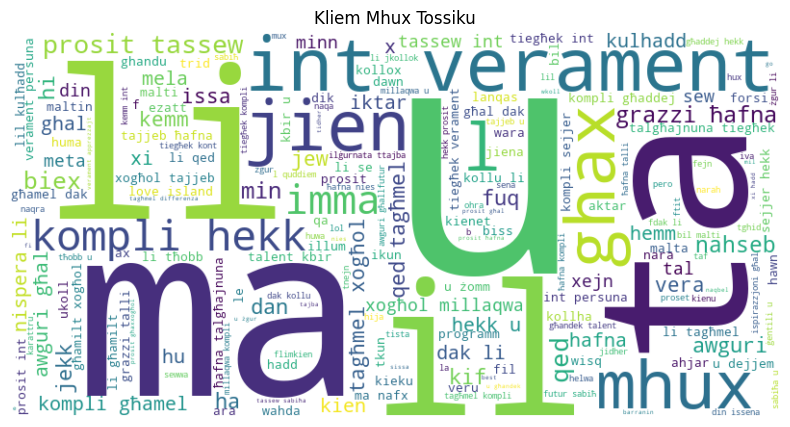

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample dataset with Maltese comments written using English keyboard
df = pd.read_csv('./Analysis.csv')

# Generate word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Separate the text based on isToxic classification
toxic_text = ' '.join(df[df['isToxic'] == 1]['comment'])
nontoxic_text = ' '.join(df[df['isToxic'] == 0]['comment'])

# Generate and display word clouds
generate_word_cloud(toxic_text, 'Kliem Tossiku')
generate_word_cloud(nontoxic_text, 'Kliem Mhux Tossiku')

In [8]:
import os
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import stat


def check_overfitting(metrics):
    best_epoch = metrics['best_epoch'] - 1
    if metrics['train_accuracies'][best_epoch] > metrics['val_accuracies'][best_epoch] + 0.05:
        print(f"Model {metrics['model_name']} might be overfitting. Training accuracy is significantly higher than validation accuracy at the best epoch.")
    else:
        print(f"Model {metrics['model_name']} does not show significant signs of overfitting.")

def plot_metrics(models_metrics, save_path='./Graphs'):
    # Ensure the save_path directory exists
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # Plot validation accuracy per epoch for all models
    plt.figure(figsize=(14, 10))
    for metrics in models_metrics:
        plt.plot(metrics['val_accuracies'], label=f"{metrics['model_name']} - Validation Accuracy")
    plt.title('Validation Accuracy per Epoch for All Models', fontsize=22)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel('Validation Accuracy', fontsize=18)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

    # Plot loss per epoch for each model separately and save the plot with the model name
    for metrics in models_metrics:
        plt.figure(figsize=(14, 10))
        plt.plot(metrics['train_losses'], label='Training Loss', color='blue', linewidth=2, marker='o', markersize=6)
        plt.plot(metrics['val_losses'], label='Validation Loss', color='orange', linewidth=2, marker='s', markersize=6)
        best_epoch_idx = metrics['best_epoch']
        plt.axvline(best_epoch_idx, linestyle='--', color='green', label='Best Epoch', linewidth=2)
        plt.annotate(f'Best Epoch: {best_epoch_idx}', xy=(best_epoch_idx, metrics['best_val_loss']), 
                     xytext=(best_epoch_idx + 1, metrics['best_val_loss'] + 0.02),
                     arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=2),
                     fontsize=16, color='green', weight='bold', backgroundcolor='white')
        plt.title(f'{metrics["model_name"]} - Loss per Epoch', fontsize=22)
        plt.xlabel('Epoch', fontsize=18)
        plt.ylabel('Loss', fontsize=18)
        plt.legend(fontsize=14)
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.tight_layout()
        file_path = os.path.join(save_path, f'{metrics["model_name"]}.png')
        plt.savefig(file_path)
        plt.show()

def ensure_permissions(file_path):
    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file at {file_path} does not exist.")
    
    # Check current file permissions
    file_stat = os.stat(file_path)
    print(f"Current permissions: {oct(file_stat.st_mode)}")
    
    # Set file permissions to read and write for the owner
    os.chmod(file_path, stat.S_IRUSR | stat.S_IWUSR)

def process_metrics(file_path):
    try:
        # Ensure the file has correct permissions
        ensure_permissions(file_path)
        
        # Load the metrics CSV
        metrics = pd.read_csv(file_path)
        model_name = os.path.basename(os.path.dirname(file_path))  # Adjust as needed
        
        # Determine the best epoch based on the minimum validation loss
        best_epoch = metrics['Val Loss'].idxmin() + 1  # Convert 0-based index to 1-based epoch number
        best_val_loss = metrics['Val Loss'].min()
        
        return {
            'model_name': model_name,
            'best_epoch': best_epoch,
            'train_accuracies': metrics['Train Accuracy'].tolist(),
            'val_accuracies': metrics['Val Accuracy'].tolist(),
            'train_losses': metrics['Train Loss'].tolist(),
            'val_losses': metrics['Val Loss'].tolist(),
            'best_val_loss': best_val_loss
        }
    except PermissionError as e:
        print(f"Permission error: {e}")
    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except IOError as e:
        print(f"I/O error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

Current permissions: 0o100666
Current permissions: 0o100666
Current permissions: 0o100666
Current permissions: 0o100666
Model mBERTu_ENG does not show significant signs of overfitting.
Model BERT_ENG does not show significant signs of overfitting.
Model XLM-R_ENG does not show significant signs of overfitting.
Model RoBERTa_ENG does not show significant signs of overfitting.


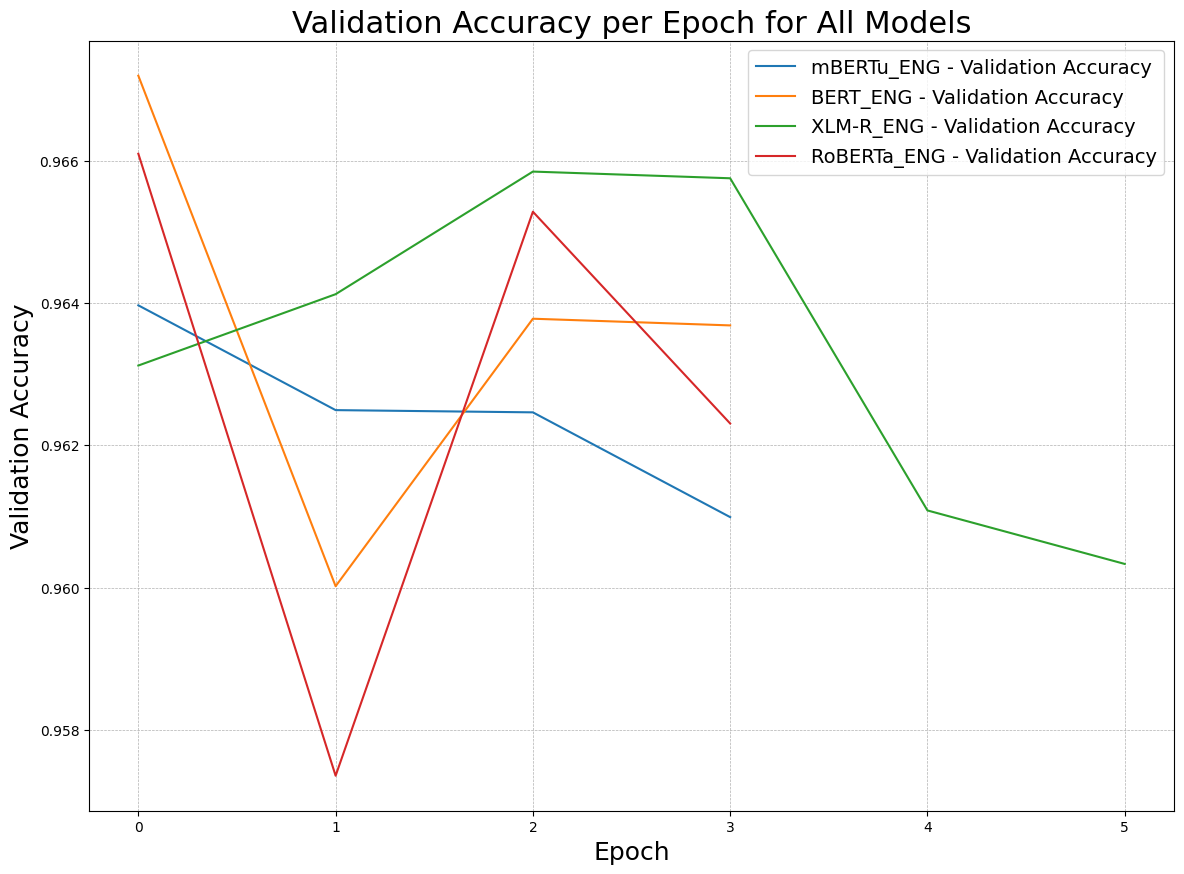

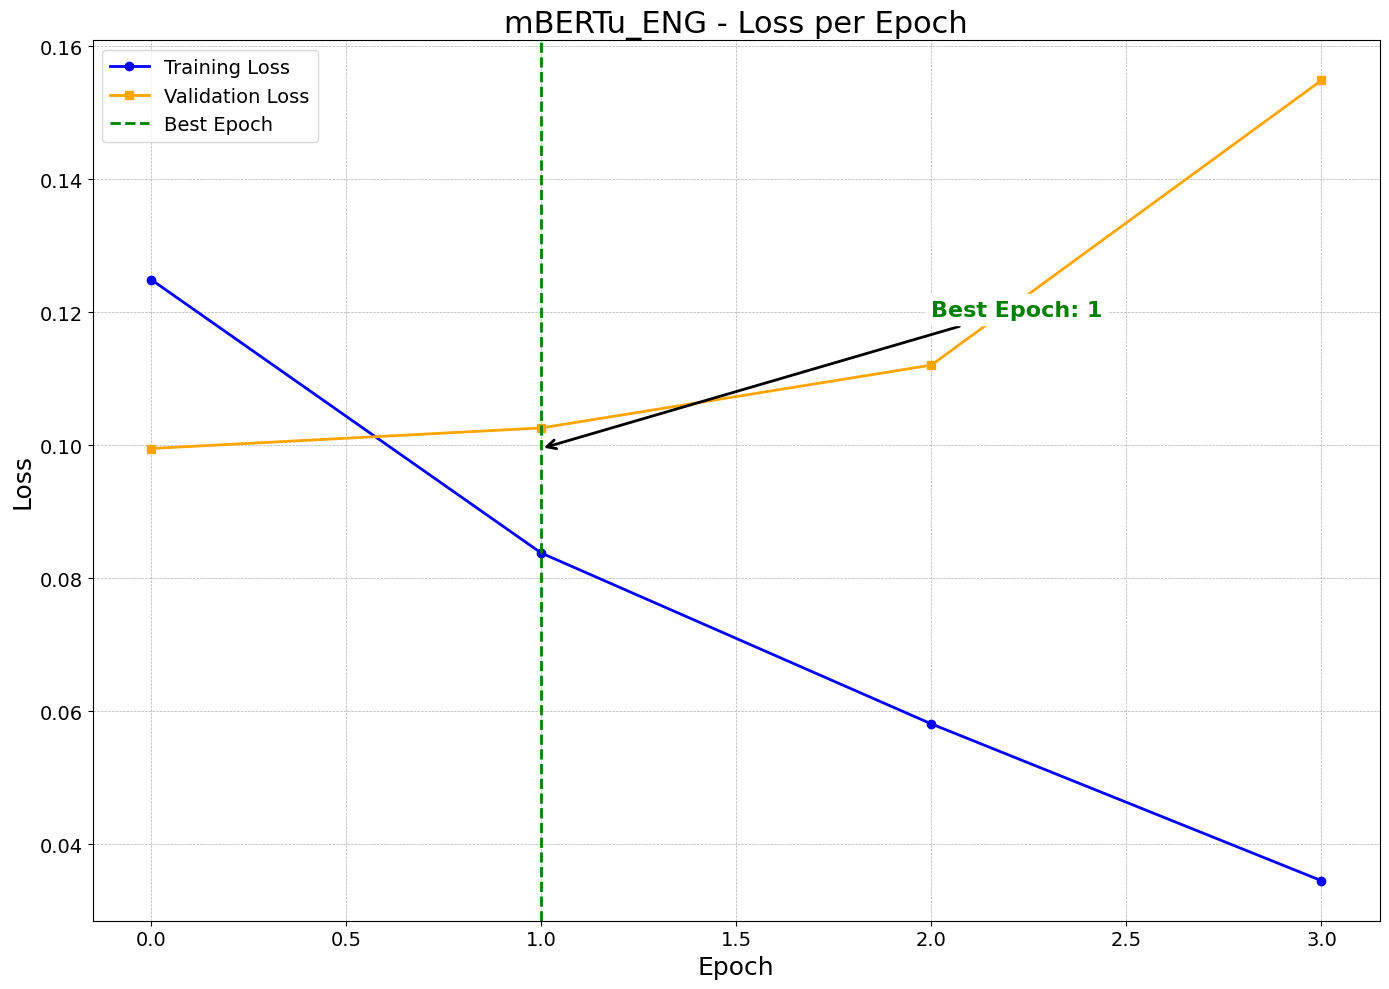

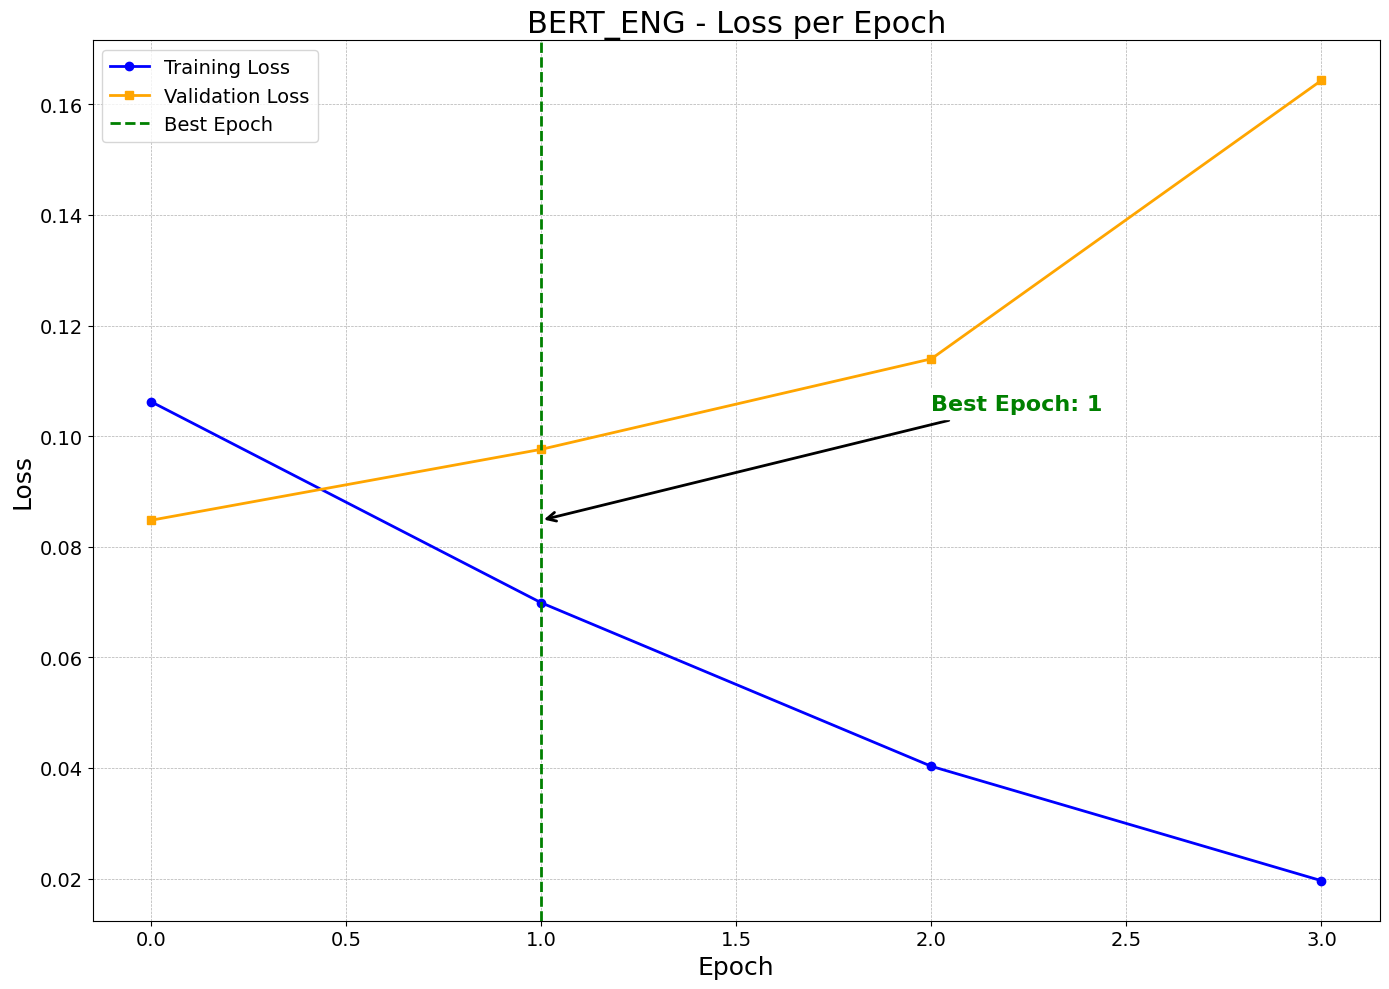

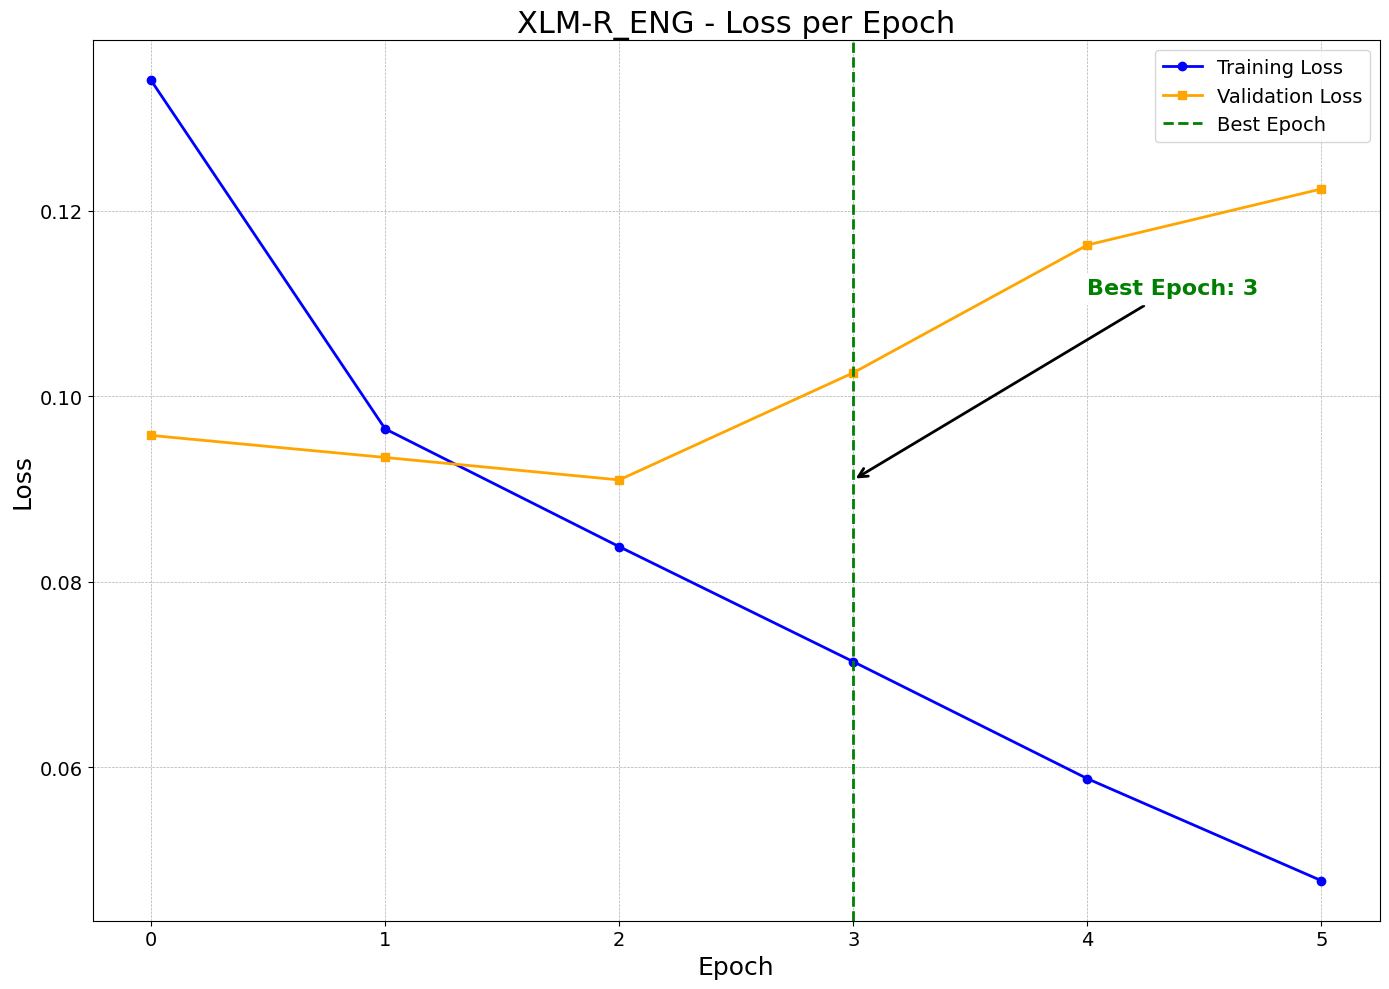

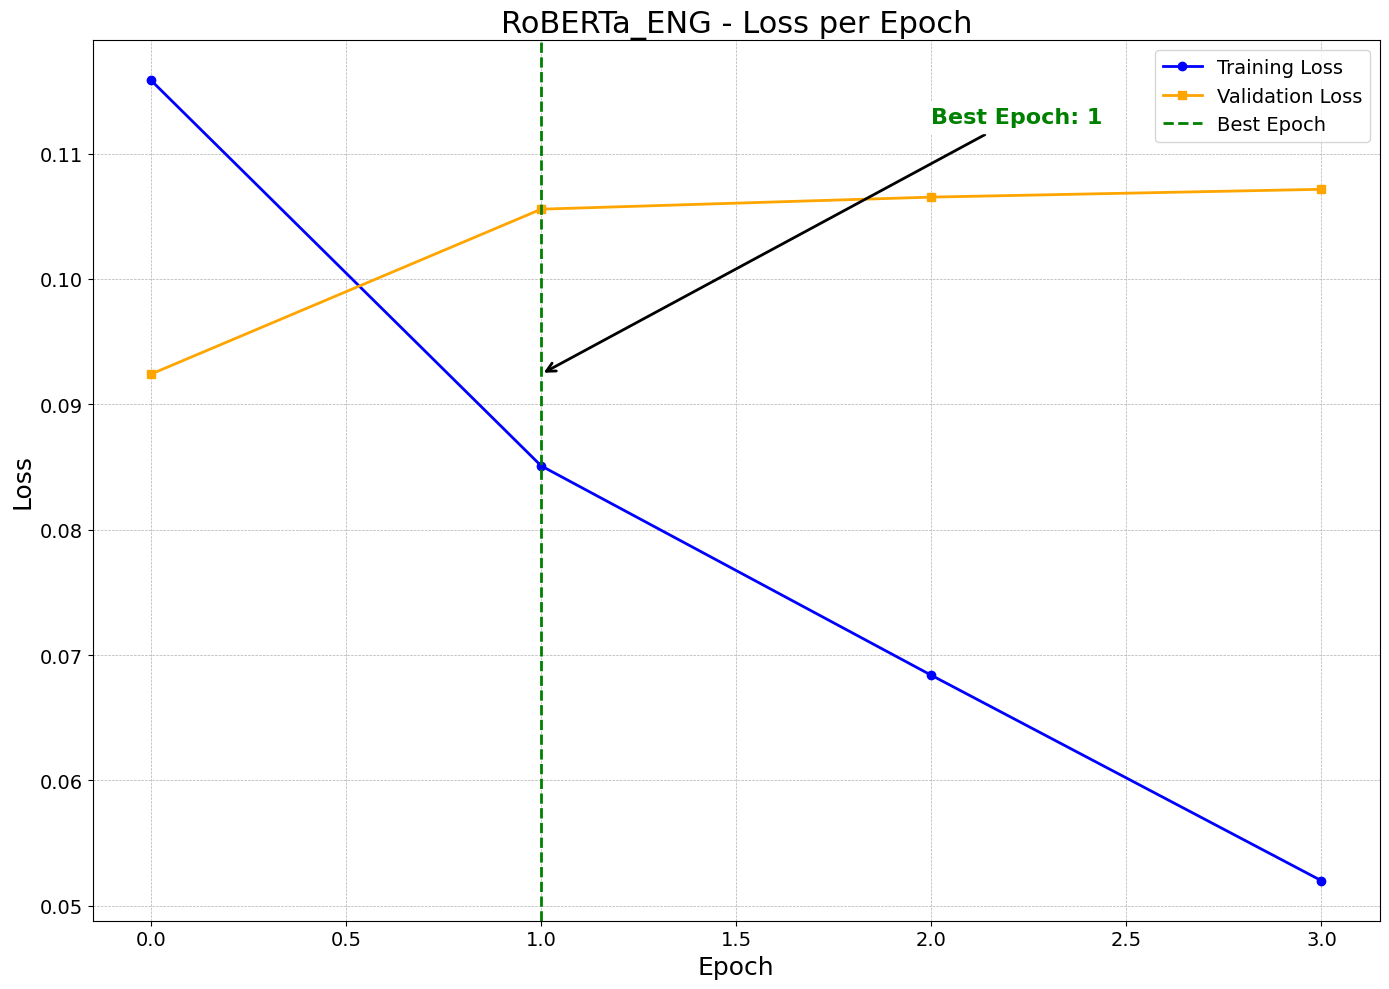

In [10]:
import os
import stat
import pandas as pd

# Example usage
custom_paths = [
    ".\\models\\Experiments\\Validation\\Experiment-1\\mBERTu_ENG\\metrics.csv",  # Adjust as needed
    ".\\models\\Experiments\\Validation\\Experiment-1\\BERT_ENG\\metrics.csv",    # Adjust as needed
    ".\\models\\Experiments\\Validation\\Experiment-1\\XLM-R_ENG\\metrics.csv",   # Adjust as needed
    ".\\models\\Experiments\\Validation\\Experiment-1\\RoBERTa_ENG\\metrics.csv"  # Adjust as needed
]

models_metrics = [process_metrics(folder) for folder in custom_paths]

for metrics in models_metrics:
    check_overfitting(metrics)

plot_metrics(models_metrics)

Current permissions: 0o100666
Current permissions: 0o100666
Current permissions: 0o100666
Current permissions: 0o100666
Model mBERTu_FT does not show significant signs of overfitting.
Model BERT_FT does not show significant signs of overfitting.
Model XLM-R_FT does not show significant signs of overfitting.
Model RoBERTa_FT does not show significant signs of overfitting.


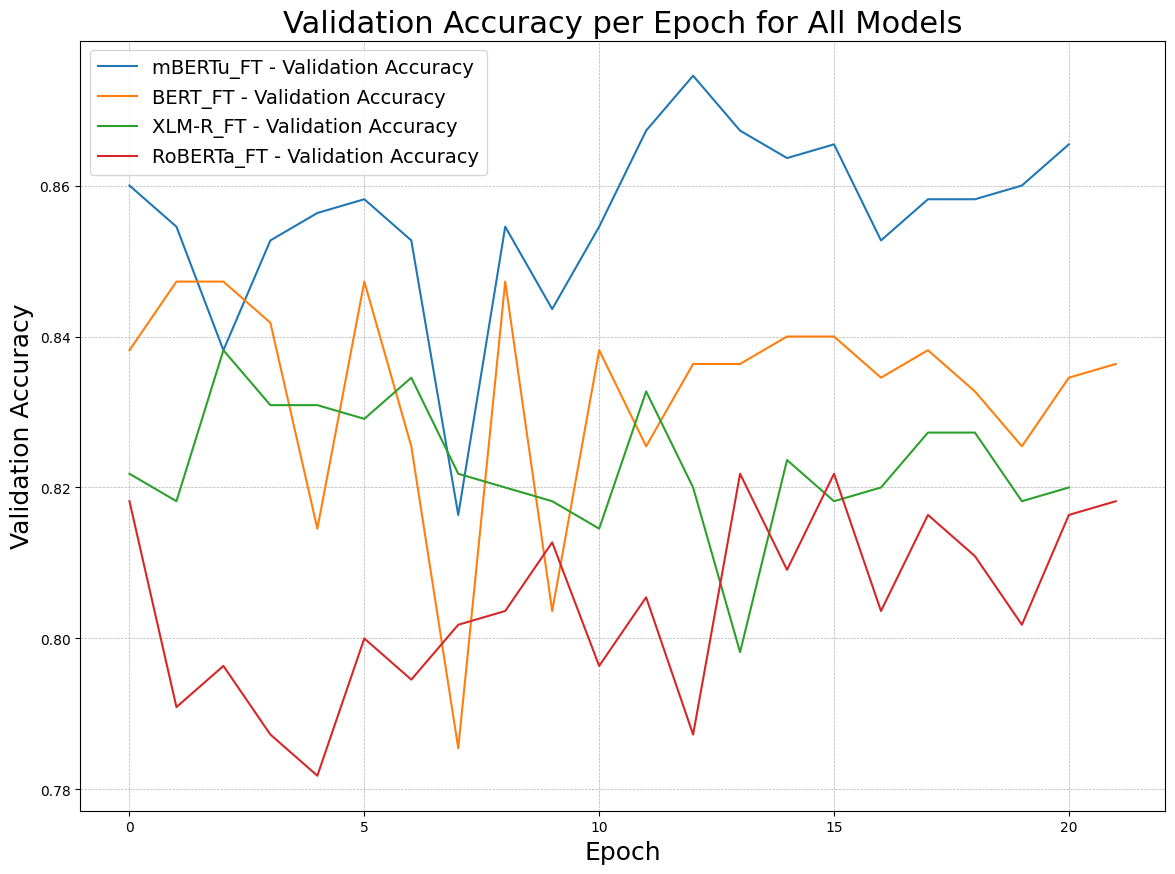

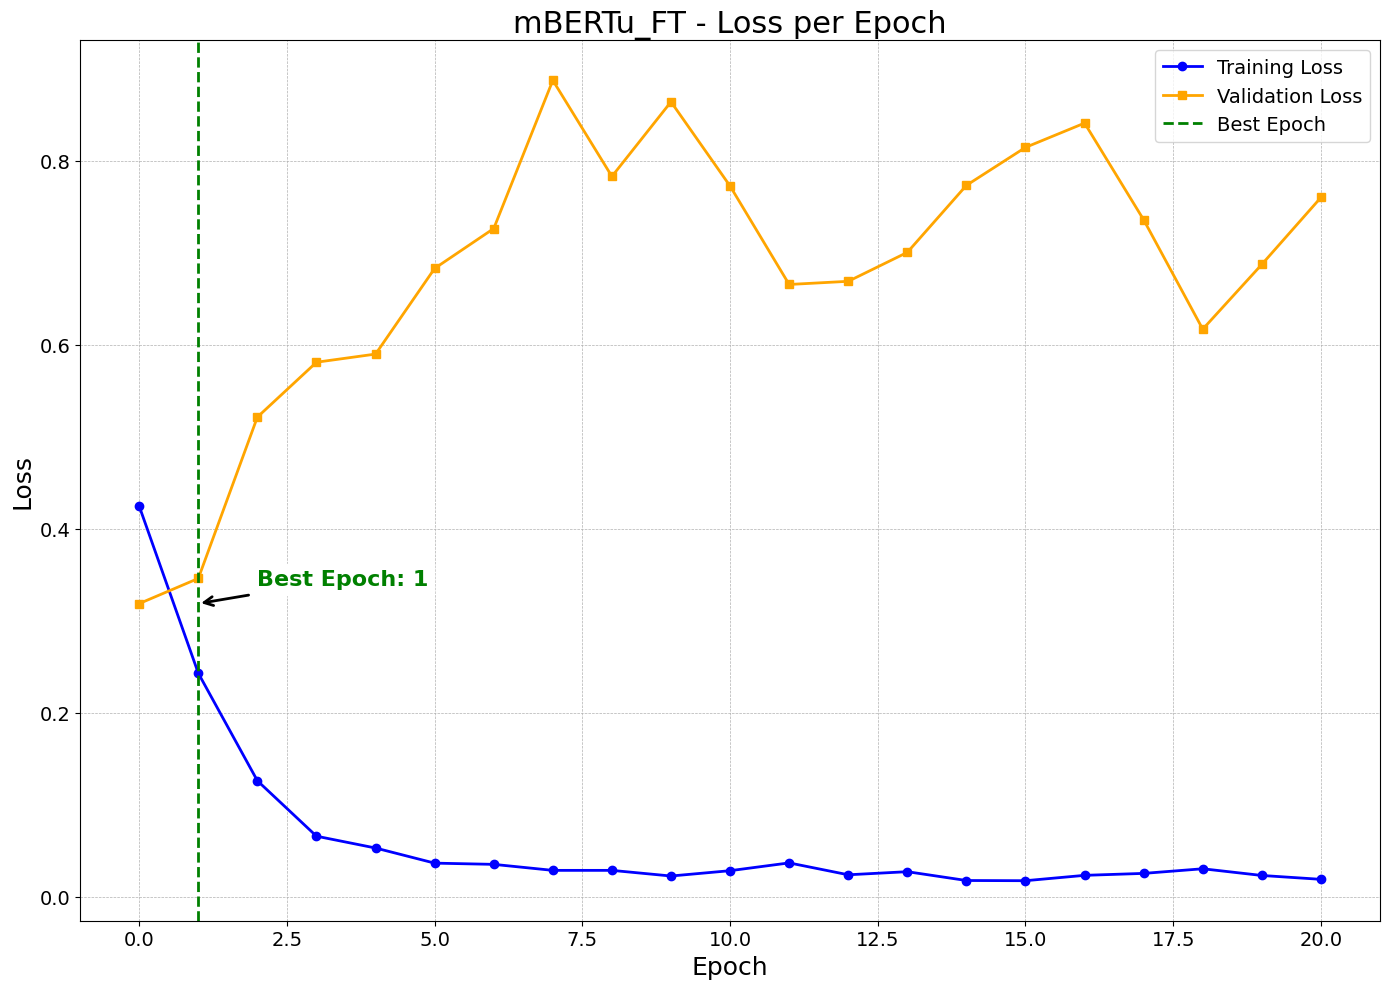

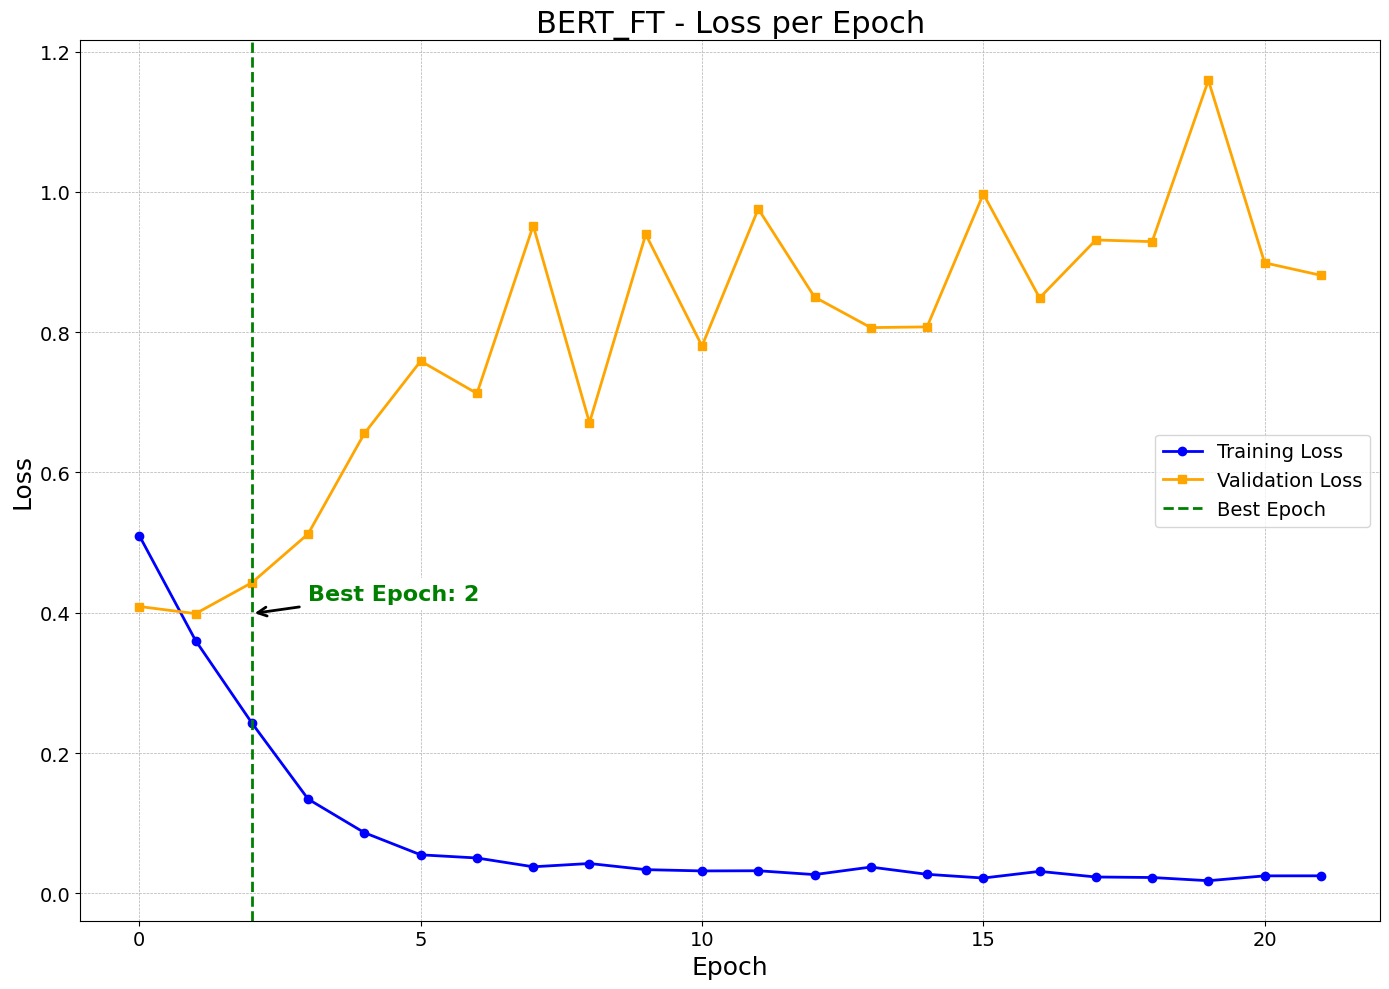

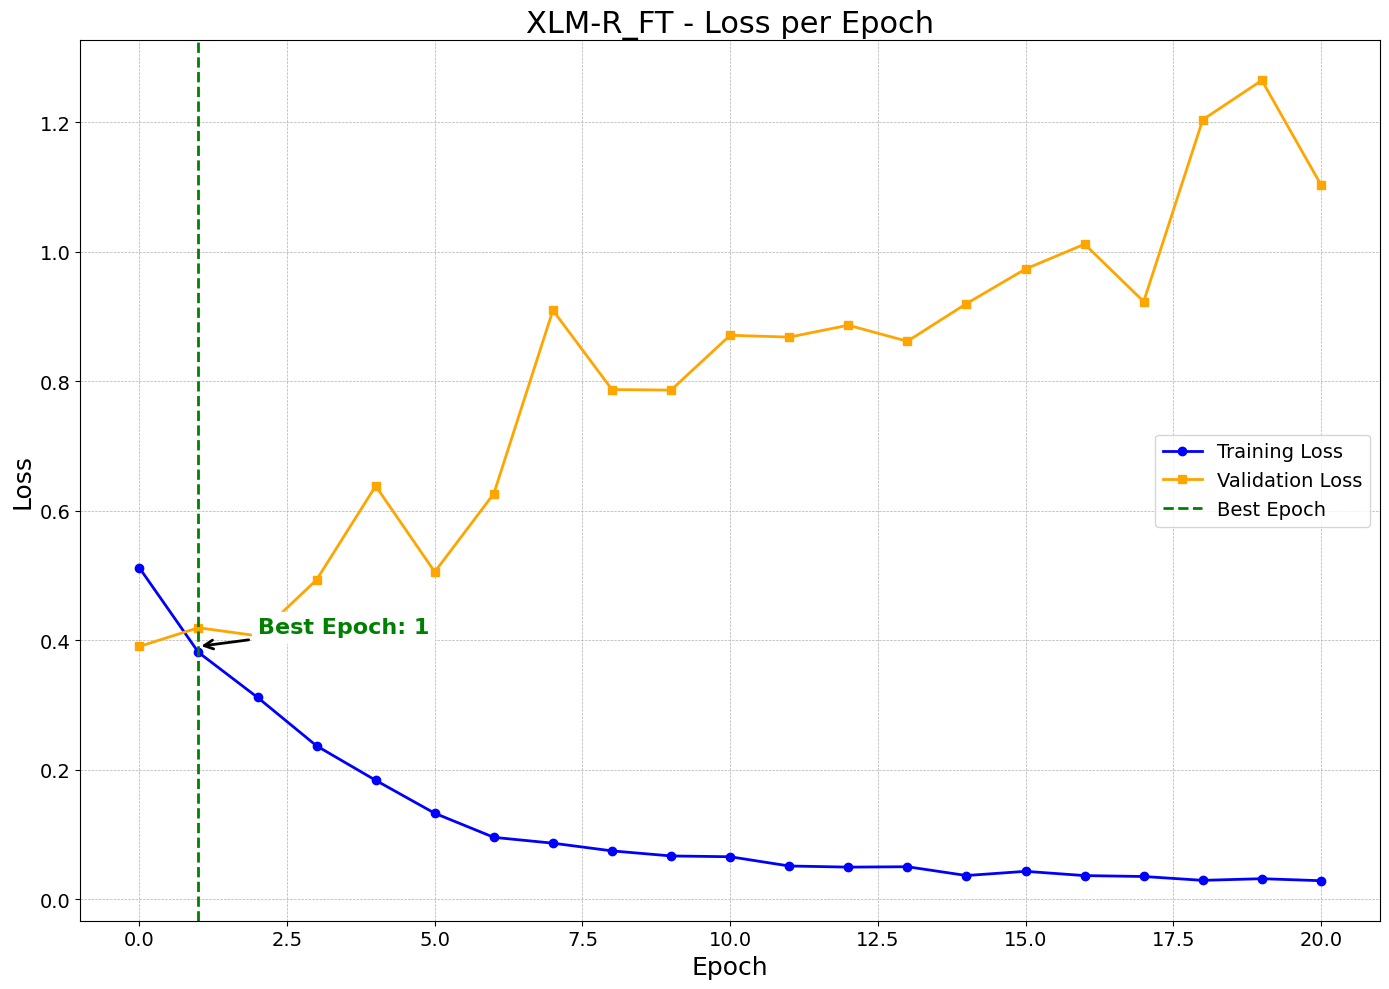

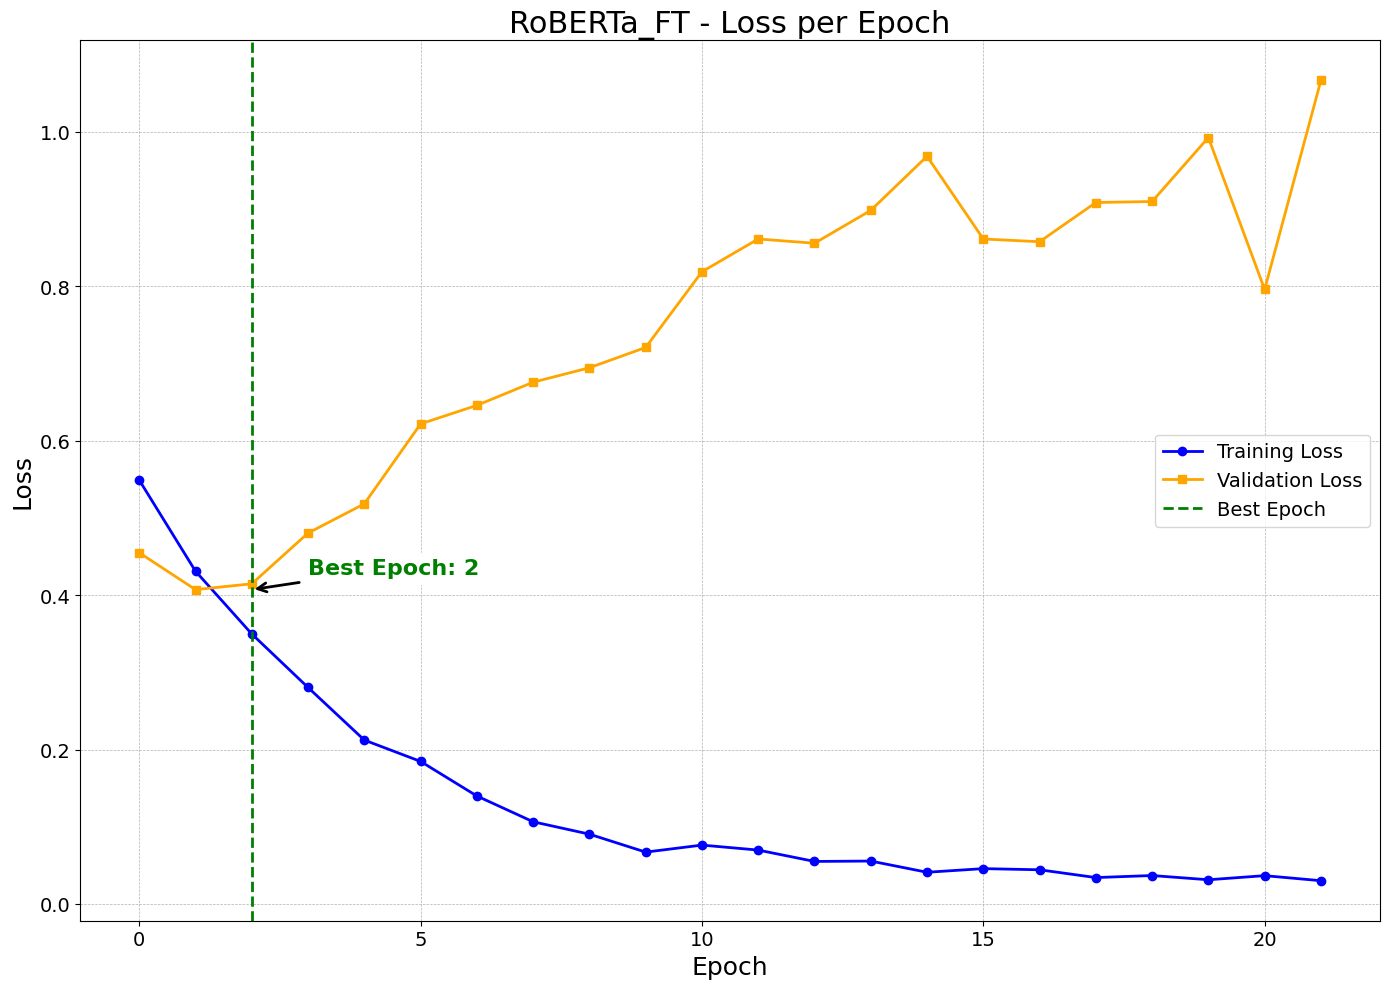

In [9]:
custom_paths = [
    "./models/Experiments/Validation/Experiment-2/mBERTu_FT/metrics.csv",
    "./models/Experiments/Validation/Experiment-2/BERT_FT/metrics.csv",
    "./models/Experiments/Validation/Experiment-2/XLM-R_FT/metrics.csv",
    "./models/Experiments/Validation/Experiment-2/RoBERTa_FT/metrics.csv"
]

models_metrics = [process_metrics(folder) for folder in custom_paths]

for metrics in models_metrics:
    check_overfitting(metrics)

plot_metrics(models_metrics)